In [1]:
from BBBacktesterModule import *
spread = 1.4
pips = 0.0001

## Define a tester object

In [2]:
tester = BBBacktester("AUD_JPY_2016_2021.csv", "c", "2016-01-01", "2019-12-31", spread*pips/2) 
        #mult by 2 for a 'round trip', multiply by pips
    

## Optimize parameters and plot best strategy backtest

BEST COMBINATION: FREQUENCY = 365.0-MINUTE CHART | SMA = 130.0 | DEV = 1.3333333333333333 | Multiple = 1.405155
----------------------------------------------------------------------------------------------------


SIMPLE CONTRARIAN STRATEGY | INSTRUMENT = c | FREQ = 365.0 | SMA = 130 | DEV = 1.3333333333333333
----------------------------------------------------------------------------------------------------


PERFORMANCE MEASURES:


Multiple (Strategy):         1.924247
Multiple (Buy-and-Hold):     0.884779
--------------------------------------
Out-/Underperformance:       1.039468


CAGR:                        0.190502
Annualized Mean:             0.174782
Annualized Std:              0.471883
Sharpe Ratio:                0.370393
Sortino Ratio:               0.498569
Maximum Drawdown:            0.518547
Calmar Ratio:                0.367377
Max Drawdown Duration:       497 Days
Kelly Criterion:             1.321907


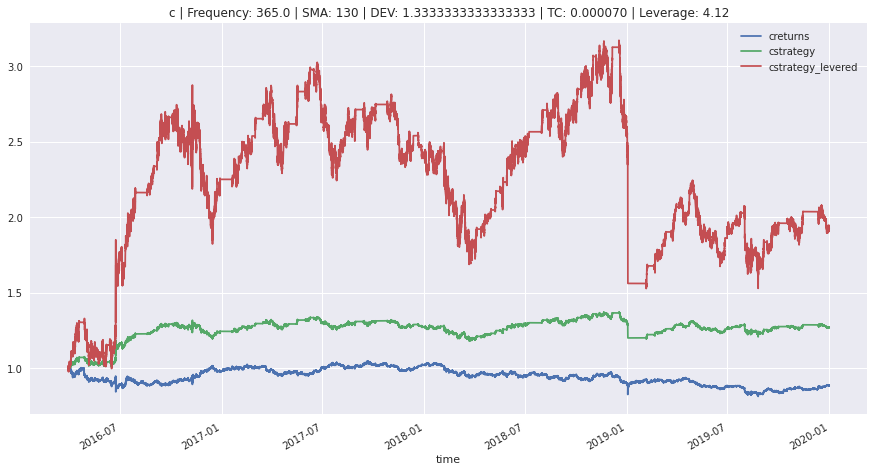

In [3]:
tester.optimize_strategy((5,400,40),(10,150,40),(1,2,10), metric = "Multiple") #quick
half_kelly = (tester.calculate_kelly_criterion(tester.results.strategy))/2
tester.add_leverage(leverage = half_kelly, sl = -0.35)
tester.plot_results(leverage = True)

## Test optimal strategy on forward data

SIMPLE CONTRARIAN STRATEGY | INSTRUMENT = c | FREQ = 365.0 | SMA = 130 | DEV = 1.3333333333333333
----------------------------------------------------------------------------------------------------


PERFORMANCE MEASURES:


Multiple (Strategy):         1.000718
Multiple (Buy-and-Hold):     1.070992
--------------------------------------
Out-/Underperformance:       -0.070274


CAGR:                        0.000410
Annualized Mean:             0.000409
Annualized Std:              0.000121
Sharpe Ratio:                3.381512
Sortino Ratio:               12.136717
Maximum Drawdown:            0.000043
Calmar Ratio:                9.559240
Max Drawdown Duration:       81 Days
Kelly Criterion:             27,965.615481


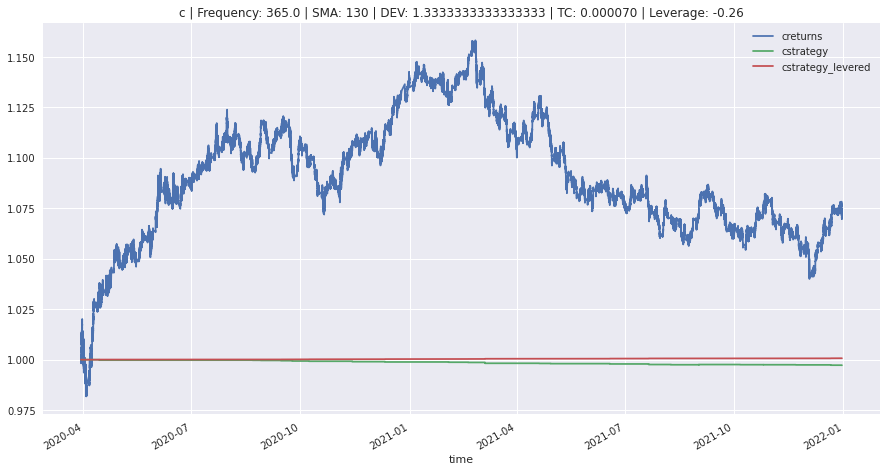

In [4]:
best = tester.results_overview.nlargest(1,columns='Performance')

forward = BBBacktester("AUD_CAD_2016_2021.csv", "c", "2020-01-01", "2021-12-31", spread*pips/2) #mult by 2 for a 'round trip', multiply by pips
forward.test_strategy(freq=best.Freq.values[0], sma=best.Sma.values[0], dev = best.Dev.values[0])
fw_half_kelly = (forward.calculate_kelly_criterion(forward.results.strategy))/2
forward.add_leverage(leverage = fw_half_kelly, sl = -0.35)
forward.plot_results(leverage=True)